# Compare FIO and N rasters w/ Septic sent to zero

- Septic removal is .3 for FIO and .5 for N right now
- Goal is to calc pixel level diference if septic removal is set to 100% (e.g. ignoring septics)

In [14]:
import pandas as pd
import rasterio 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as py

# Pour Points

In [6]:
data_in = '/Users/cascade/Github/wastewater_ohi/data/interim/effluent_output/'

FIO = gpd.read_file(data_in+'FIO_pour_point_totals_all.shp')
FIO_s0 = gpd.read_file(data_in+'FIO_sep0_pour_point_totals_all.shp')

In [7]:
FIO.head()

,basin_id,area,FIO,SUM_FERTC,SUM_PESTC,SUM_IMPV,geometry
0,pa_00001,32.224645,0.0,0.0,0.0,0.0,POINT (-11131367.53169552 2257717.418009712)
1,pa_00002,4.131365,0.0,0.0,0.0,0.0,POINT (16597098.37149552 1802943.992258685)
2,pa_00003,0.826273,0.0,0.0,0.0,0.0,POINT (16598814.51067837 1798864.385129204)
3,pa_00004,0.826273,0.0,0.0,0.0,0.0,POINT (16598407.2527051 1797893.783110829)
4,pa_00005,0.826273,0.0,0.0,0.0,0.0,POINT (16597999.71633073 1796923.230176016)


In [12]:
FIO_sorted = FIO['FIO'].sort_values(ascending=False)
FIO_s0_sorted = FIO_s0['FIO'].sort_values(ascending=False)

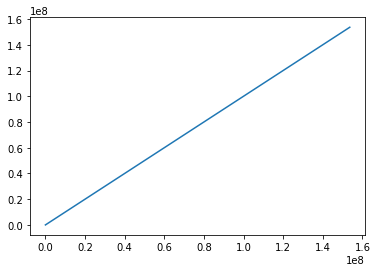

In [15]:
py.plot(FIO_sorted, FIO_s0_sorted)

# Pixel-level

In [2]:
FIO = rasterio.open('/Users/cascade/Github/wastewater_ohi/data/interim/effluent_FIO.tif')
N = rasterio.open('/Users/cascade/Github/wastewater_ohi/data/interim/effluent_N.tif')
FIO_s0 = rasterio.open('/Users/cascade/Github/wastewater_ohi/data/interim/effluent_FIO_sept0.tif')
N_s0 = rasterio.open('/Users/cascade/Github/wastewater_ohi/data/interim/effluent_N_sept0.tif')

# FIO

In [3]:
# Get the band
FIO_arr = FIO.read(1)
FIO_arr_s0 = FIO_s0.read(1)

In [4]:
# Set to NA
FIO_arr[FIO_arr < 0] = np.nan
FIO_arr

# Set to NA
FIO_arr_s0[FIO_arr_s0 < 0] = np.nan
FIO_arr_s0

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [5]:
# get difference 
FIO_dif = FIO_arr_s0 - FIO_arr

In [ ]:
# make pct
FIO_dif = np.divide(FIO_dif, FIO_arr, out=np.zeros_like(a), where=FIO_arr!=0)

In [ ]:
FIO

In [ ]:
# write them out
meta = FIO.meta
with rasterio.open('/Users/cascade/Desktop/sept0/FIO_dif.tif', 'w', **meta) as out:
    out.write_band(1, FIO_dif*100)